In [1]:
#Importing necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from scipy.stats import stats,kurtosis, skew
import seaborn as sns
from synartisi import interpret_skewness

In [2]:
#Read and clean txt file from punctuation and uppercase characters with regex module. Non-greek characters are not removed.
init_text = ""
with open('Ιστορίες της κρίσης - Χρήστος Γκίμτσας.pdf.v2.txt', encoding='utf8') as f: 
    init_text = f.read()
#f.close()

text = re.sub(r'[^\w\s]', ' ', init_text)
text  = re.sub(r"\s+", " ", text)
text = text.lower()

print(init_text[0:200],"\n")
print(text[0:200])

words = text.split(" ")  
print(len(words))


Το βιβλίο «Ιστορίες της κρίσης» του Χρήστου Γκίμτσα διανέμεται ελεύθερα στο διαδίκτυο με άδεια Creative Commons. Επιτρέπεται ελεύθερα η αναδημοσίευση και η αποσπασματική παρουσίασή του. Η αναφορά του  

το βιβλίο ιστορίες της κρίσης του χρήστου γκίμτσα διανέμεται ελεύθερα στο διαδίκτυο με άδεια creative commons επιτρέπεται ελεύθερα η αναδημοσίευση και η αποσπασματική παρουσίασή του η αναφορά του ονόμ
22055


In [3]:
#Subtext generation: each subtext contains maximum 400 tokens. Last file (56th) will be removed from the metric-computation with 
#QUITA, because it's empty.
limit = 400
total_files = round(len(words)/limit)

if total_files*limit<=len(words):
    total_files =  total_files + 1
print("number of files\t", total_files)
counter = -1
range1 = np.linspace(1, total_files, total_files)
range1
for i in range1:
    temp = words[counter+1:counter+1+limit]
    counter = counter+limit+1
    filename = "krisi/k_"+str(i)+".txt"
    print(filename)
    output_file = open(filename, 'w', encoding ="UTF8")
    for word in temp:
        output_file.write(word + " ")
    output_file.close()
   

number of files	 56
krisi/k_1.0.txt
krisi/k_2.0.txt
krisi/k_3.0.txt
krisi/k_4.0.txt
krisi/k_5.0.txt
krisi/k_6.0.txt
krisi/k_7.0.txt
krisi/k_8.0.txt
krisi/k_9.0.txt
krisi/k_10.0.txt
krisi/k_11.0.txt
krisi/k_12.0.txt
krisi/k_13.0.txt
krisi/k_14.0.txt
krisi/k_15.0.txt
krisi/k_16.0.txt
krisi/k_17.0.txt
krisi/k_18.0.txt
krisi/k_19.0.txt
krisi/k_20.0.txt
krisi/k_21.0.txt
krisi/k_22.0.txt
krisi/k_23.0.txt
krisi/k_24.0.txt
krisi/k_25.0.txt
krisi/k_26.0.txt
krisi/k_27.0.txt
krisi/k_28.0.txt
krisi/k_29.0.txt
krisi/k_30.0.txt
krisi/k_31.0.txt
krisi/k_32.0.txt
krisi/k_33.0.txt
krisi/k_34.0.txt
krisi/k_35.0.txt
krisi/k_36.0.txt
krisi/k_37.0.txt
krisi/k_38.0.txt
krisi/k_39.0.txt
krisi/k_40.0.txt
krisi/k_41.0.txt
krisi/k_42.0.txt
krisi/k_43.0.txt
krisi/k_44.0.txt
krisi/k_45.0.txt
krisi/k_46.0.txt
krisi/k_47.0.txt
krisi/k_48.0.txt
krisi/k_49.0.txt
krisi/k_50.0.txt
krisi/k_51.0.txt
krisi/k_52.0.txt
krisi/k_53.0.txt
krisi/k_54.0.txt
krisi/k_55.0.txt
krisi/k_56.0.txt


In [4]:
# Create the file path with the file that you would like Python to read in.
file_path = "Ex_1_posotiki - Results.csv"

# Reading in the csv file to a pandas dataframe.
texts_results = pd.read_csv(file_path, sep='\t', decimal=",")

print("shape:\t", texts_results.shape)

texts_results.head()

shape:	 (55, 12)


,,Text,Types,Tokens,Frequencies,TTR,h-Point,Entropy,Average Tokens Length,R1,Λ (Lambda),Unnamed: 11
0,k_1.0,k_1.0,225,400,[...],0.562500,7.000000,7.162671,4.815000,0.821250,1.617990,NaN
1,k_2.0,k_2.0,227,394,[...],0.576142,6.666667,7.213779,4.563452,0.843204,1.578178,NaN
2,k_3.0,k_3.0,230,400,[...],0.575000,7.666667,7.240429,4.642500,0.855972,1.583049,NaN
3,k_4.0,k_4.0,233,396,[...],0.588384,8.333333,7.241439,4.646465,0.842733,1.594790,NaN
4,k_5.0,k_5.0,224,398,[...],0.562814,7.333333,7.209537,4.731156,0.831379,1.548756,NaN


In [5]:
#Remove unwanted columns through indexing with the DataFrame.keys() method: first,last and the empty 'Frequencies' column are dropped.
keys = texts_results.keys() 
print(keys)
keys[1]
texts_results.drop([keys[0],keys[4], keys[-1]], axis='columns', inplace=True)
print(texts_results.shape)
texts_results.head()


Index([' ', 'Text', 'Types', 'Tokens', 'Frequencies', 'TTR', 'h-Point',
       'Entropy', 'Average Tokens Length', 'R1', 'Λ (Lambda)', 'Unnamed: 11'],
      dtype='object')
(55, 9)


,Text,Types,Tokens,TTR,h-Point,Entropy,Average Tokens Length,R1,Λ (Lambda)
0,k_1.0,225,400,0.562500,7.000000,7.162671,4.815000,0.821250,1.617990
1,k_2.0,227,394,0.576142,6.666667,7.213779,4.563452,0.843204,1.578178
2,k_3.0,230,400,0.575000,7.666667,7.240429,4.642500,0.855972,1.583049
3,k_4.0,233,396,0.588384,8.333333,7.241439,4.646465,0.842733,1.594790
4,k_5.0,224,398,0.562814,7.333333,7.209537,4.731156,0.831379,1.548756


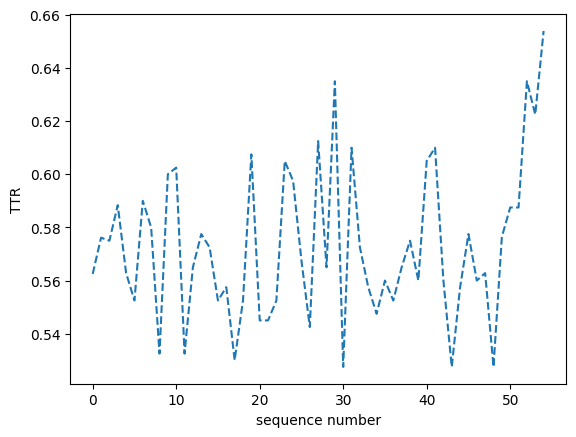

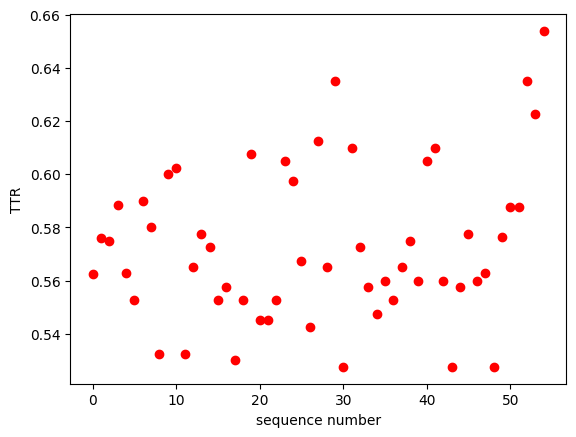

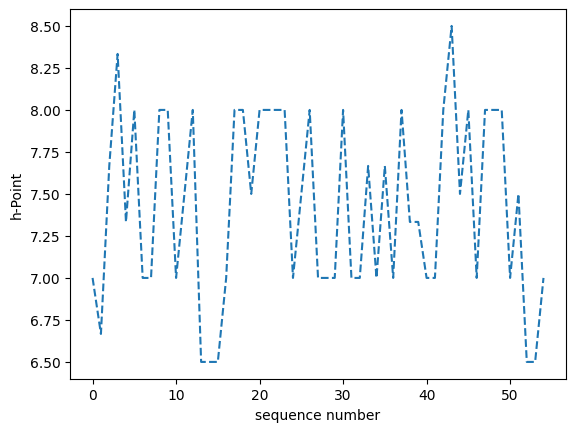

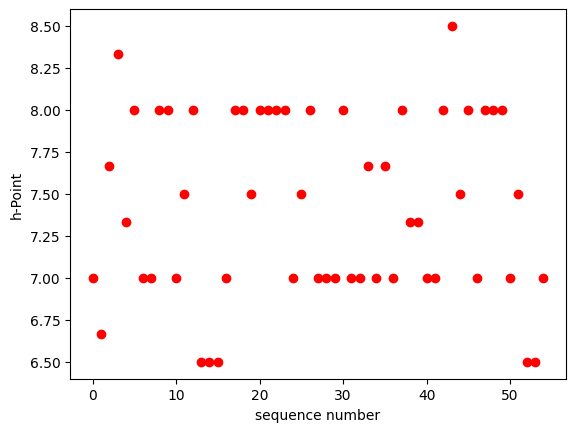

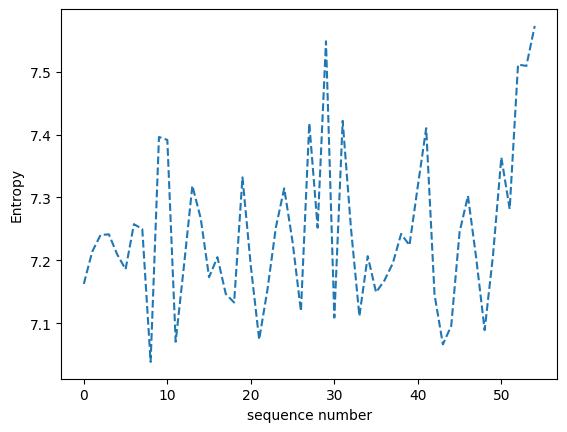

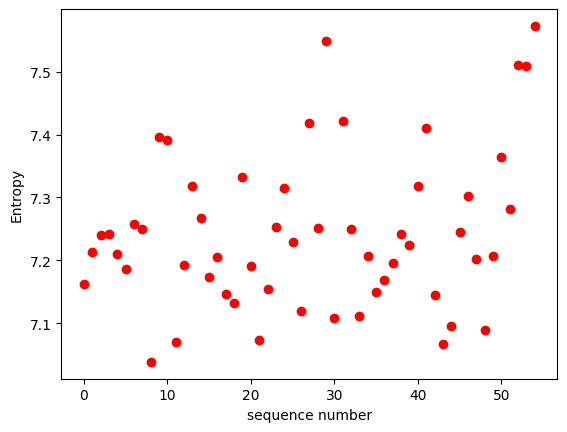

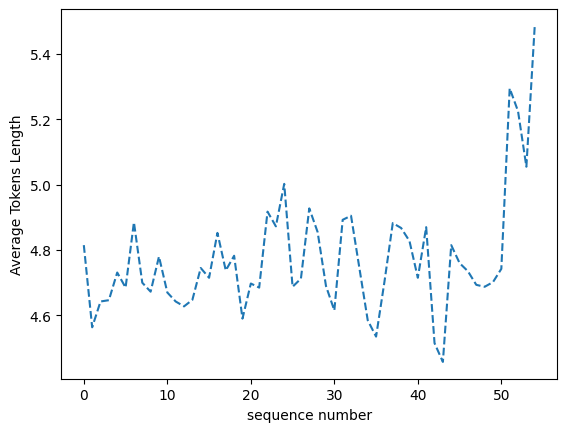

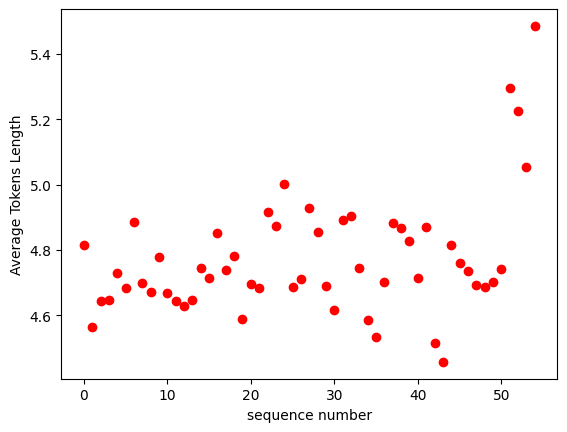

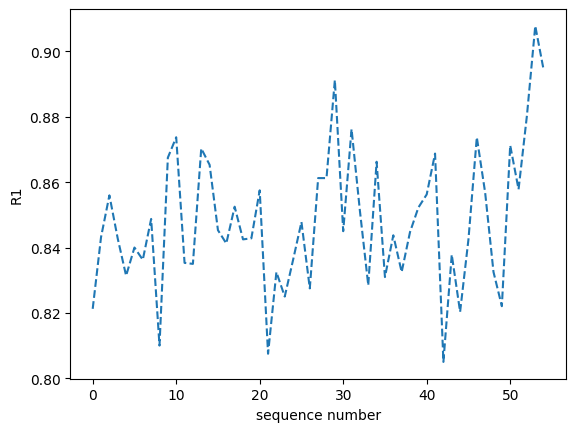

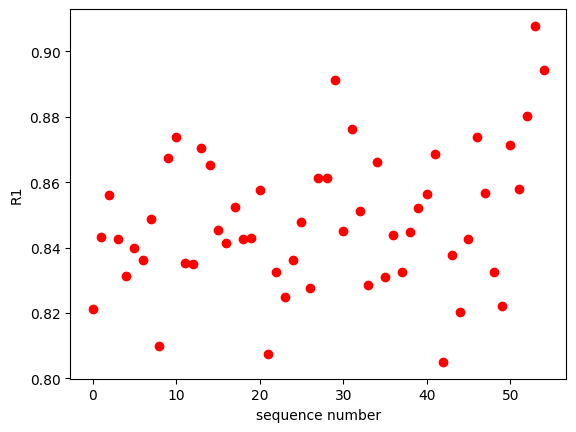

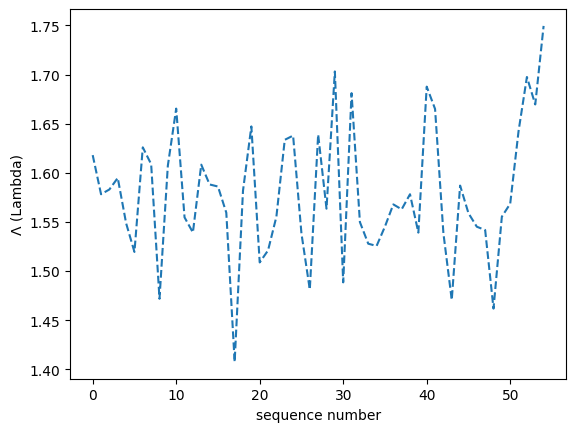

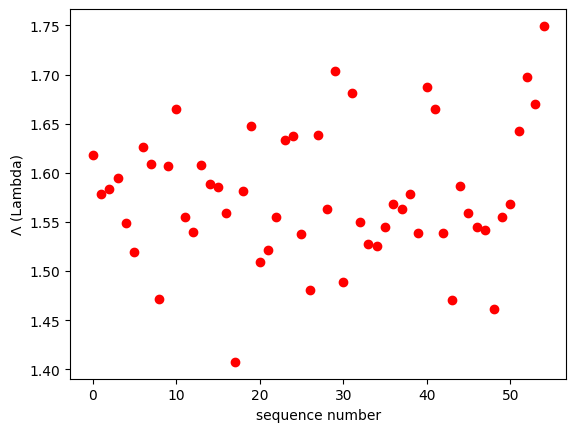

In [6]:
#Plotting 2 diagrams for each index (TTR, h-Point,Entropy, Average Tokens Length, R1, Λ (Lambda))
#y_axis= the index
#x_axis= the number of subtexts
for current_variable in texts_results[["TTR","h-Point","Entropy","Average Tokens Length","R1","Λ (Lambda)"]]:
    plt.plot(texts_results[current_variable], '--');
    plt.xlabel('sequence number')
    plt.ylabel(current_variable)
    plt.show()
    plt.plot(texts_results[current_variable], 'ro');
    plt.xlabel('sequence number')
    plt.ylabel(current_variable)
    plt.show()

min	 0.5275
max	 0.653944
median	 0.565
q25 = 0.5525
q75 = 0.5891919999999999
iqr = 0.03669199999999995
'minimum'	 0.49746200000000007
'maximum'	 0.6442299999999999


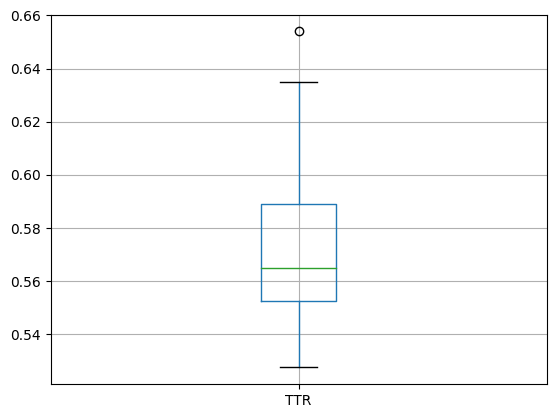

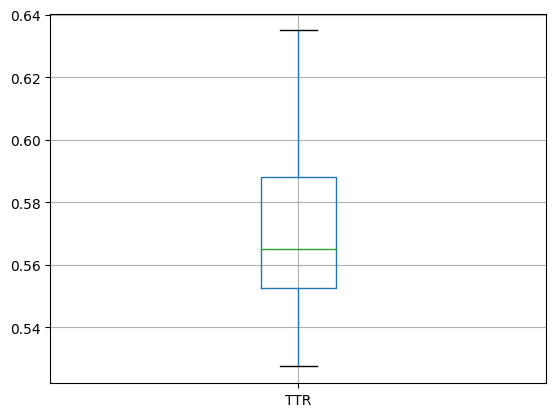

mean:	 0.57
median:	 0.56
standard deviation:	 0.03
____________________________________________________________________________________________________
min	 6.5
max	 8.5
median	 7.5
q25 = 7.0
q75 = 8.0
iqr = 1.0
'minimum'	 5.5
'maximum'	 9.5


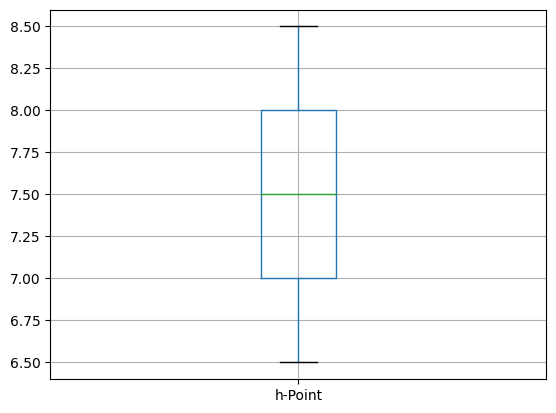

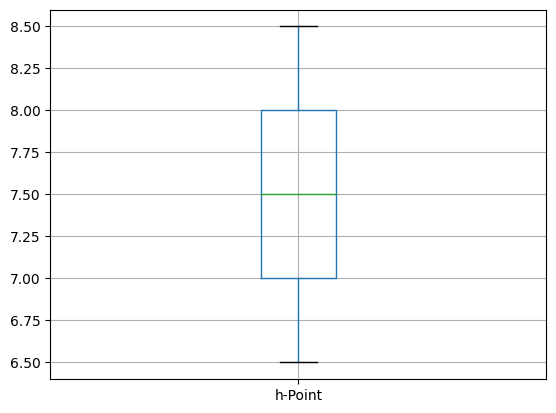

mean:	 7.43
median:	 7.5
standard deviation:	 0.55
____________________________________________________________________________________________________
min	 7.038712
max	 7.572615
median	 7.22408
q25 = 7.158491
q75 = 7.3085819999999995
iqr = 0.15009099999999975
'minimum'	 6.9333545
'maximum'	 7.533718499999999


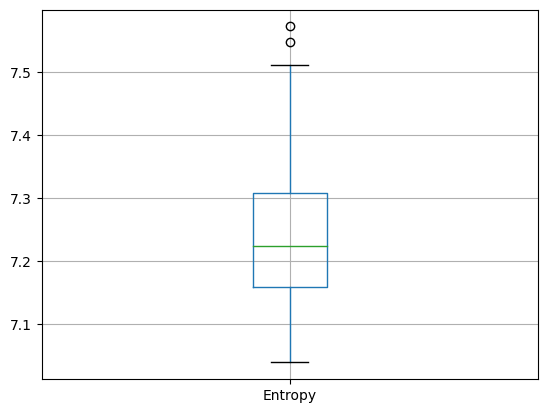

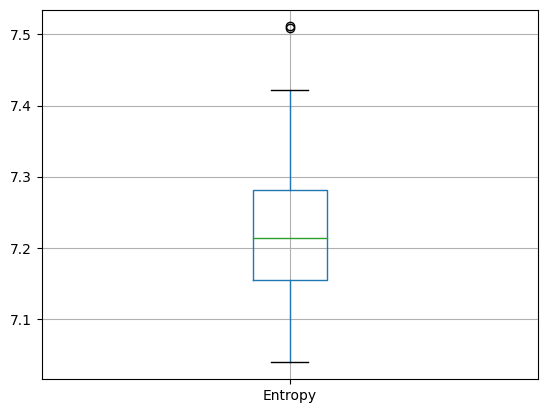

mean:	 7.23
median:	 7.21
standard deviation:	 0.11
____________________________________________________________________________________________________
min	 4.4575
max	 5.486005
median	 4.731156
q25 = 4.67875
q75 = 4.86125
iqr = 0.1825000000000001
'minimum'	 4.404999999999999
'maximum'	 5.135


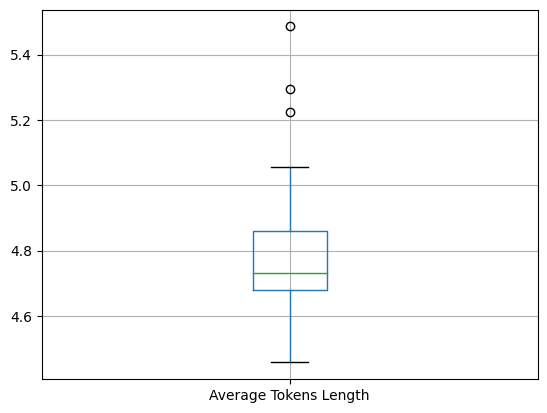

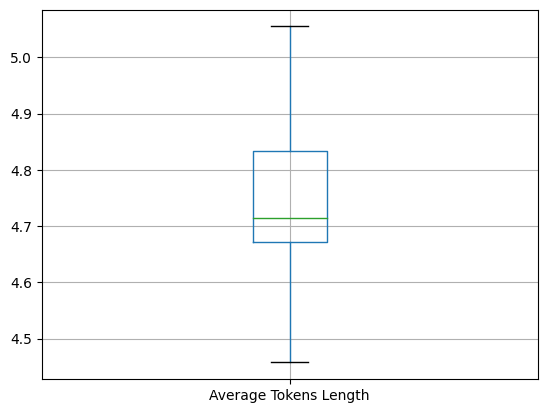

mean:	 4.74
median:	 4.72
standard deviation:	 0.12
____________________________________________________________________________________________________
min	 0.805
max	 0.907812
median	 0.844722
q25 = 0.83375
q75 = 0.86125
iqr = 0.02749999999999997
'minimum'	 0.7925
'maximum'	 0.9024999999999999


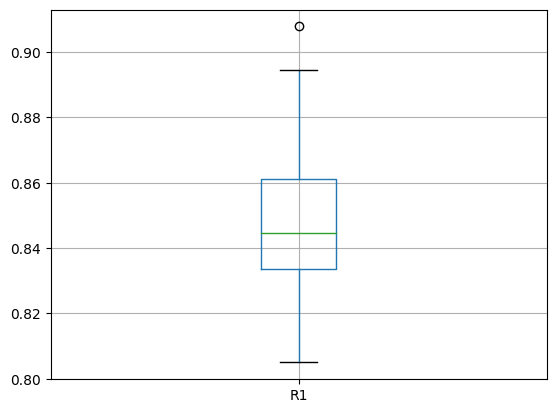

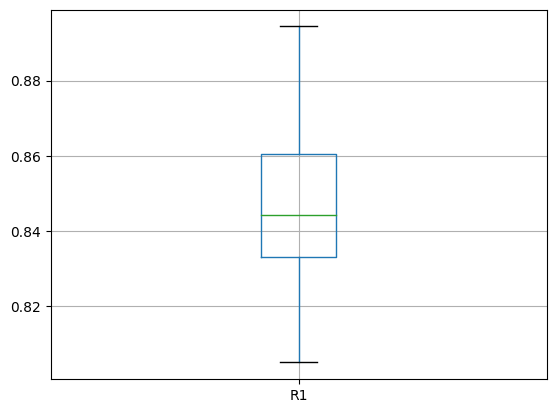

mean:	 0.85
median:	 0.84
standard deviation:	 0.02
____________________________________________________________________________________________________
min	 1.407573
max	 1.749444
median	 1.567858
q25 = 1.5392139999999999
q75 = 1.621944
iqr = 0.08273000000000019
'minimum'	 1.4151189999999996
'maximum'	 1.7460390000000003


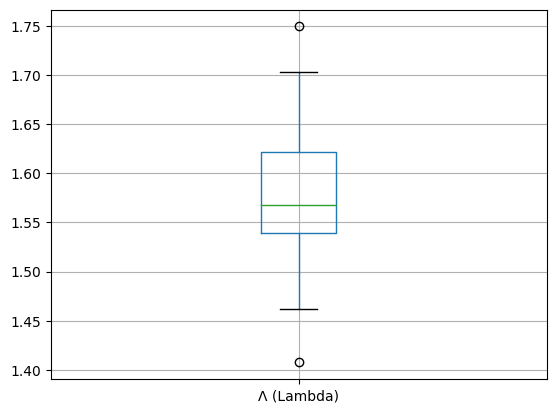

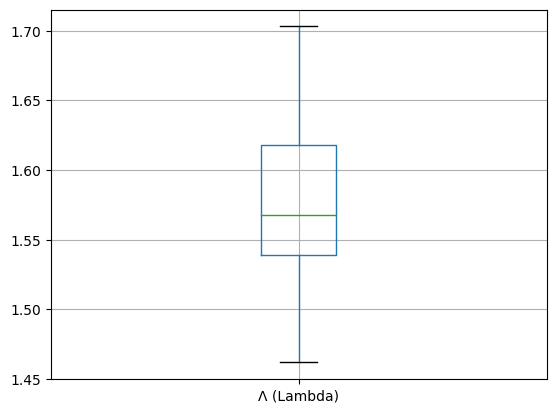

mean:	 1.58
median:	 1.57
standard deviation:	 0.06
____________________________________________________________________________________________________


In [7]:
#For a clear visualisation of the outliers we will plot the boxplot for each quantitative index. And then based on the Q1, Q3 and
#IQR values we will remove possible outliers from the values of each index.

for i in texts_results[["TTR","h-Point","Entropy","Average Tokens Length","R1","Λ (Lambda)"]]:
    print("min\t", min(texts_results[i]))
    print("max\t", max(texts_results[i]))
    print("median\t", texts_results[i].median())
    q75, q25 = np.percentile(texts_results[i], [75 ,25]) 
    print("q25 =", q25)
    print("q75 =", q75)
    iqr = q75 - q25
    print("iqr =", iqr)
    print("'minimum'\t",q25-1.5*iqr)
    print("'maximum'\t",q75+1.5*iqr)
    texts_results.boxplot(column=[i])
    plt.show()

    no_outliers_texts_results=texts_results[~((texts_results[i] < (q25 - 1.5* iqr)) | (texts_results[i]> (q75 + 1.5 * iqr)))]
    no_outliers_texts_results.boxplot(column=[i])
    plt.show()
    mean_value=no_outliers_texts_results[i].mean()
    median_value=no_outliers_texts_results[i].median()
    std_value=no_outliers_texts_results[i].std()
    print("mean:\t", round(mean_value,2))
    print("median:\t", round(median_value,2))
    print("standard deviation:\t", round(std_value,2))
    print("_"*100)


#Intuitions from boxplot visualisation before and after removing outliers
#TTR: no significant change reported
#h-Point: no outliers plotted. 50% of the values are equally spread between 7.0 and 8.0. This gives us an intuition about a normal
#distribution of the data

#Entropy: After removing outliers, the upper boundary reduced from 7.5 to 7.4. 
#The subtexts with value 7.5 are now considered outliers.

#Average Tokens Length: Clearer view of the IQR

#R1: no significant change bserved after oultier reloval

#Λ (Lambda): Clearer view of the IQR. The median after removing outliers gives us an intuition about a negative skwness of the data



In [11]:
h1_mode=texts_results["h-Point"].mode()
print(h1_mode)

#bimodal: the values 7.0 and 8.0 occur with equal frequency in the h-point index.
# Μοιάζει να είναι διακριτή μεταβλητή. (εκεί που συναντιέται η συχνότητα με την τάξη)


0    7.0
1    8.0
dtype: float64
55


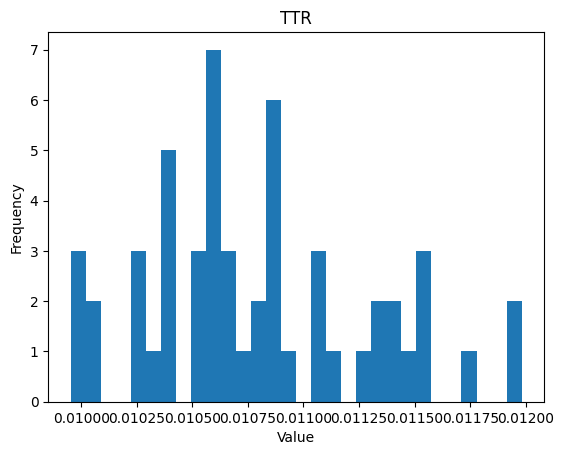

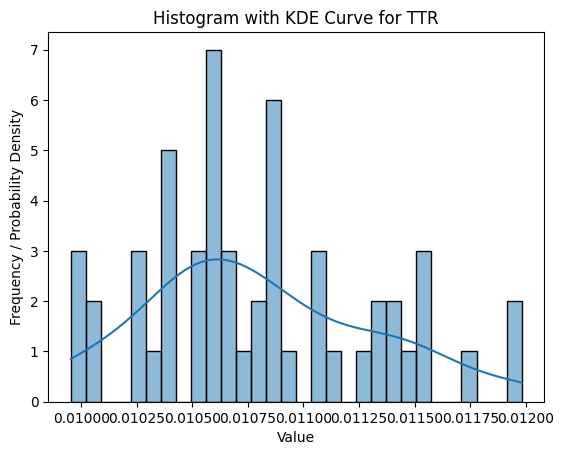


skewness:	 0.45
****right-skewed distribution (positively skewed)****

The data are fairly symmetrical.

kurtosis:	 -0.36
rule of thumb threshold:	 1.35
****mesokurtic****



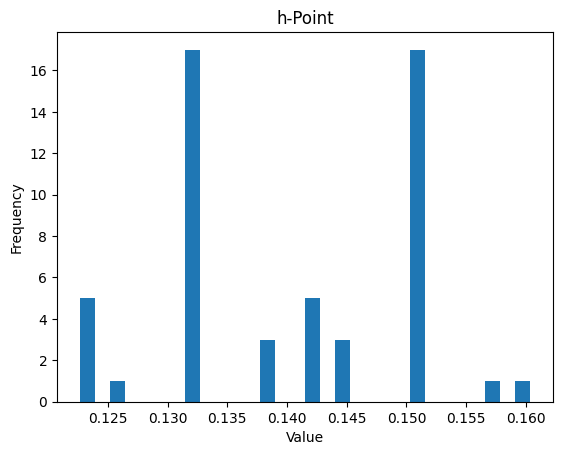

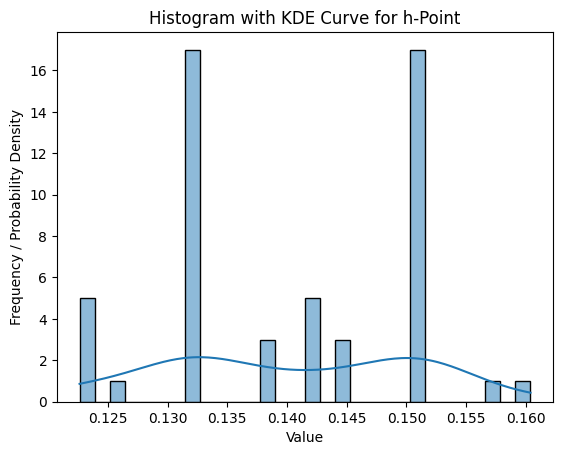


skewness:	 -0.05
****left-skewed distribution (negatively skewed)****

The data are fairly symmetrical.

kurtosis:	 -1.2
rule of thumb threshold:	 1.35
****mesokurtic****



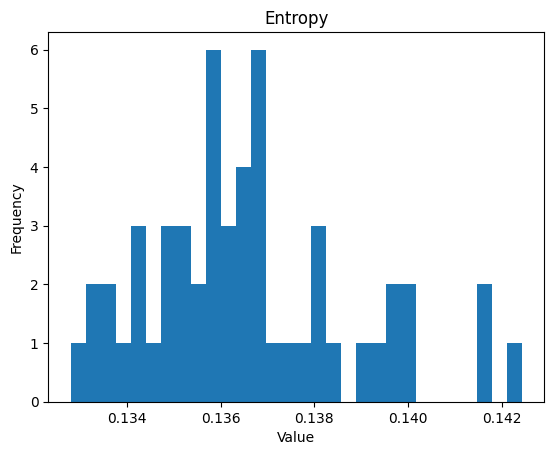

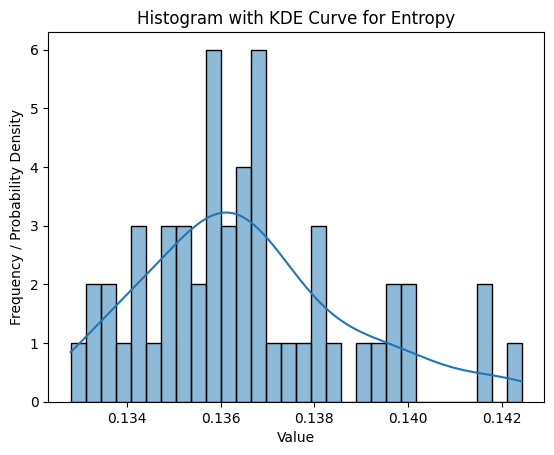


skewness:	 0.7
****right-skewed distribution (positively skewed)****

The data are moderately skewed.

kurtosis:	 0.17
rule of thumb threshold:	 1.35
****mesokurtic****



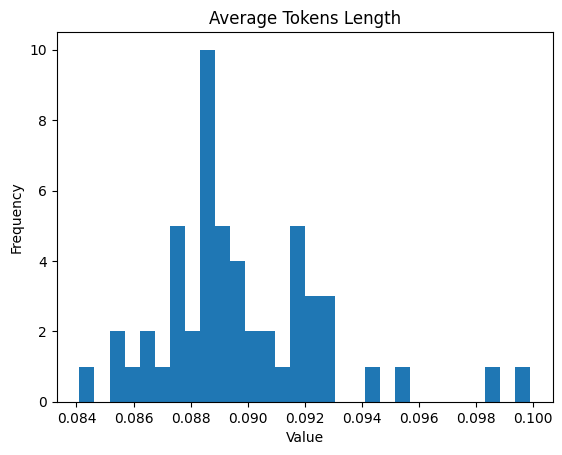

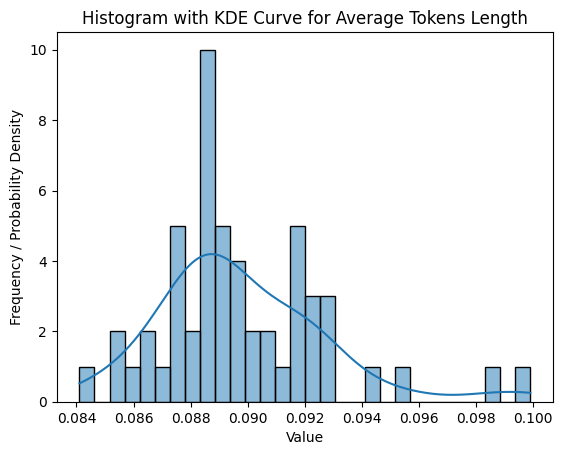


skewness:	 1.14
****right-skewed distribution (positively skewed)****

The data are highly skewed.

kurtosis:	 2.13
rule of thumb threshold:	 1.35
****leptokurtic****



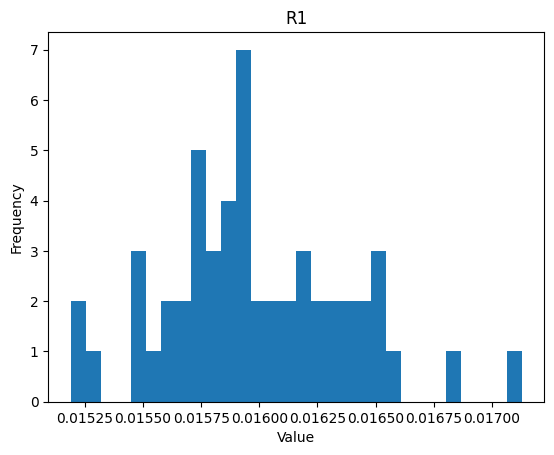

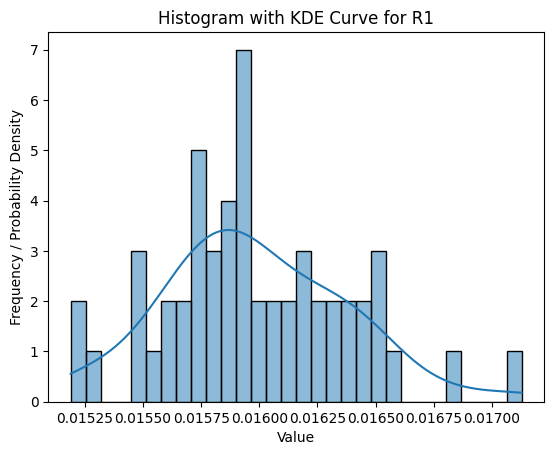


skewness:	 0.39
****right-skewed distribution (positively skewed)****

The data are fairly symmetrical.

kurtosis:	 0.27
rule of thumb threshold:	 1.35
****mesokurtic****



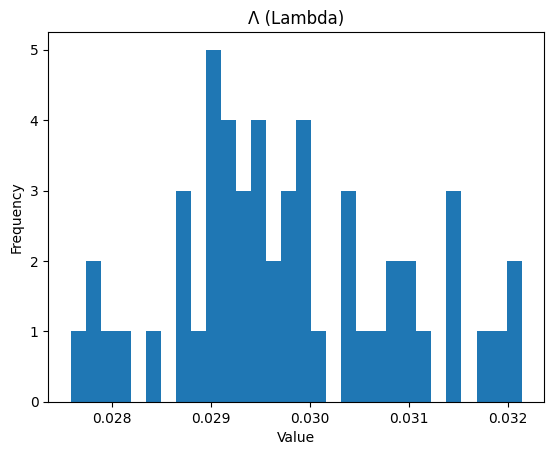

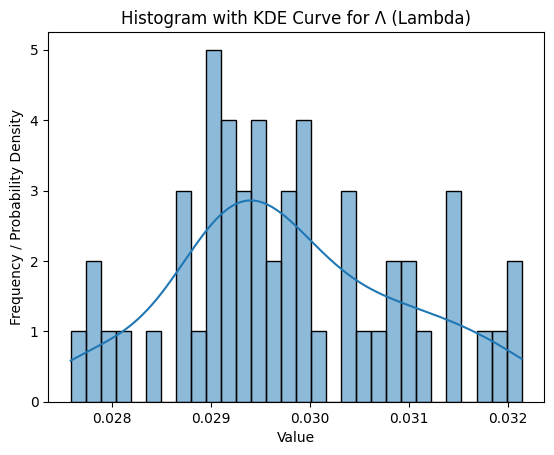


skewness:	 0.24
****right-skewed distribution (positively skewed)****

The data are fairly symmetrical.

kurtosis:	 -0.51
rule of thumb threshold:	 1.35
****mesokurtic****



In [9]:
for index in no_outliers_texts_results[["TTR","h-Point","Entropy","Average Tokens Length","R1","Λ (Lambda)"]]:
    part1 = no_outliers_texts_results[index] 
    res = part1.describe()
    part2 = part1/res.get('count')
    plt.hist(part2, bins=30)
    plt.title(index)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    sns.histplot(data=no_outliers_texts_results, x=part2,bins=30, kde=True)
    plt.xlabel('Value')
    plt.ylabel('Frequency / Probability Density')
    plt.title(f'Histogram with KDE Curve for {index}')
    plt.show()
    skewness = skew(part2)
    print("\nskewness:\t", round(skewness,2))
    if skewness < 0:
        print("****left-skewed distribution (negatively skewed)****\n" )
    if skewness > 0:
        print("****right-skewed distribution (positively skewed)****\n" )
    print(interpret_skewness(no_outliers_texts_results[index]))
    kurt =kurtosis(part1)
    print("\nkurtosis:\t", round(kurt,2))
    thr = 4* (6/res.get('count'))**0.5
    print("rule of thumb threshold:\t", round(thr,2))
    if abs(kurt) > thr:
        if kurt > 0:
            print("****leptokurtic****\n" )
        if kurt < 0:
            print("****platykurtic****\n" )
    else:
        print("****mesokurtic****\n" )

In [10]:
#  interpreting the kurtosis of each distribution
#h-Point: the kyrtosis is very close to being platykurtic, but based on the given threshold it is not. 
#But visually, this distribution is definitely not close to normal.
#ATL: given the kyrtosis threshold of 1.35, only this kyrtosis index is considered substantially differetn from 0. 
#A kyrtosis index of 2.13 indicates a distribution, which has a more concentrated bulk of scores in the center,
#with relatively more extreme scores in the tails.

#For the rest quantitative indexes the kurtosis value does not exceed the given threshold, meaning that their distribution has 
#a degree of peakedness pretty close to the normal distribution.
#Combining the skewness and kurtosis results we further observe that the mesocurtic distribution of the "Entropy" index is not 
# enough to claim that this distribution is normal, because the data are also moderate skewed.

#For the rest of the indices (TTR, R1, Λ(Lambda)) we observe an overall alignment between the skweness and the kyrtosis resutls
#and a moderate resemblance to the normal distribution.